In [1]:
import requests
import nltk
from bs4 import BeautifulSoup
from collections import Counter

In [2]:
r = requests.get("https://www.gutenberg.org/files/16/16-h/16-h.htm")

r.encoding = "utf-8"

html = r.text

print(html[:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Peter Pan, by James M. Barrie</title>

<style type="text/css">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for epubs */

div.chapter {page-

In [3]:
soup = BeautifulSoup(html)

text = soup.text

print(text[:2000])





The Project Gutenberg eBook of Peter Pan, by James M. Barrie



The Project Gutenberg eBook of Peter Pan, by James M. Barrie

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online
at www.gutenberg.org. If you
are not located in the United States, you will have to check the laws of the
country where you are located before using this eBook.

Title: Peter Pan
Peter Pan and Wendy
Author: James M. Barrie
Release Date: July, 1991 [eBook #16]
[Most recently updated: February 15, 2021]
Language: English
Character set encoding: UTF-8
Produced by: Duncan Research
*** START OF THE PROJECT GUTENBERG EBOOK PETER PAN ***
Peter Pan
[PETER AND WENDY]
by J. M. Barrie [James Matthew Barrie]

A Millennium Fulcrum Edition produced in 1991 by Duncan Research. Note that
while a c

In [4]:
#Tokenization

tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

tokens = tokenizer.tokenize(text)

print(tokens[:10])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Peter', 'Pan', 'by', 'James', 'M']


In [5]:
## lower case all the words
words = [token.lower() for token in tokens]
print(words[:6])

['the', 'project', 'gutenberg', 'ebook', 'of', 'peter']


In [6]:
##stop words

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Karishma
[nltk_data]     Bhalshankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
stop_words = nltk.corpus.stopwords.words("english")

print(stop_words[:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [8]:
words_clean = [word for word in words if word not in stop_words]

print(words_clean[:6])

['project', 'gutenberg', 'ebook', 'peter', 'pan', 'james']


In [12]:
count_words = Counter(words_clean)

top_10 = count_words.most_common(20)
print(top_10)

[('peter', 409), ('wendy', 362), ('said', 358), ('would', 217), ('one', 212), ('hook', 174), ('could', 142), ('cried', 136), ('john', 133), ('time', 126), ('darling', 118), ('see', 111), ('michael', 110), ('little', 104), ('mother', 102), ('boys', 101), ('gutenberg', 99), ('children', 98), ('like', 94), ('know', 93)]


In [13]:
protogonists = ["peter", "wendy", "hook", "john"]

In [14]:
trimmed_text = text[2583:]

print(trimmed_text[:1000])

 such a sweet mocking mouth. Her
romantic mind was like the tiny boxes, one within the other, that come from the
puzzling East, however many you discover there is always one more; and her
sweet mocking mouth had one kiss on it that Wendy could never get, though there
it was, perfectly conspicuous in the right-hand corner.


The way Mr. Darling won her was this: the many gentlemen who had been boys when
she was a girl discovered simultaneously that they loved her, and they all ran
to her house to propose to her except Mr. Darling, who took a cab and nipped in
first, and so he got her. He got all of her, except the innermost box and the
kiss. He never knew about the box, and in time he gave up trying for the kiss.
Wendy thought Napoleon could have got it, but I can picture him trying, and
then going off in a passion, slamming the door.


Mr. Darling used to boast to Wendy that her mother not only loved him but
respected him. He was one of those deep ones who know about sto


Text(0.5, 1.0, "Peter Pan's most common words")

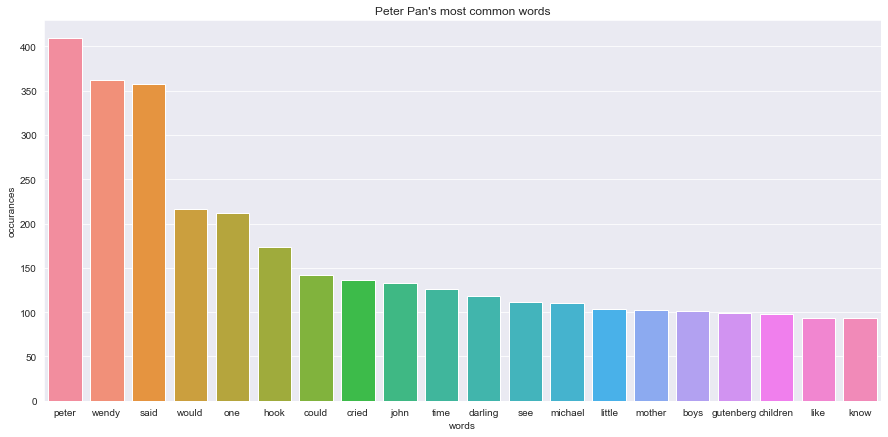

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.DataFrame(top_10, columns = ["words", "occurances"])
sns.set_style("darkgrid")
plt.figure(figsize=(15, 7))
sns.barplot(x="words", y="occurances", data=data, saturation=0.9).set_title("Peter Pan's most common words")